In [1]:
from tensorflow import keras

In [2]:
# fasion mnist
# CNN 모델 만들고 학습해서
# 레이어 추출

In [3]:
(x_train,y_train),(x_test,y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
# CNN모델 만들기
# C - P - D - F - D - D

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
model = keras.Sequential([
    keras.layers.Conv2D(32,kernel_size=3,activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.3),
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 64)                346176    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                        

In [9]:
# 모델 컴파일
model.compile(optimizer='adam',loss=keras.losses.SparseCategoricalCrossentropy(), metrics='accuracy')
history = model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 17s 3ms/step - loss: 0.4171 - accuracy: 0.8523 - val_loss: 0.3378 - val_accuracy: 0.8765
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2968 - accuracy: 0.8927 - val_loss: 0.2898 - val_accuracy: 0.8932
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2607 - accuracy: 0.9043 - val_loss: 0.2692 - val_accuracy: 0.9020
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2358 - accuracy: 0.9132 - val_loss: 0.2547 - val_accuracy: 0.9053
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2142 - accuracy: 0.9206 - val_loss: 0.2476 - val_accuracy: 0.9095
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1996 - accuracy: 0.9245 - val_loss: 0.2516 - val_accuracy: 0.9077
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1836 - accuracy: 0.9315 - val_loss: 0.2394 - val_accuracy

In [10]:
model.layers

In [15]:
conv = model.layers[0]
conv.weights[0].shape, conv.weights[1].shape

(TensorShape([3, 3, 1, 32]), TensorShape([32]))

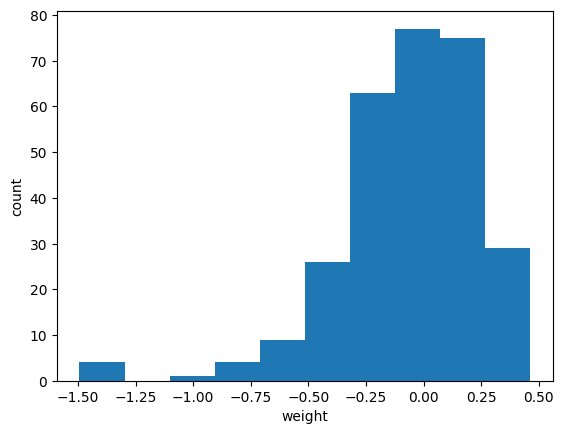

In [20]:
import matplotlib.pyplot as plt
plt.hist( conv.weights[0].numpy().reshape(-1,1) )
plt.xlabel('weight')
plt.ylabel('count')
plt.show()